# Natural Language Processing Demo

Let's take a sentence from Marcel Proust's "Swann's Way" and tokenize the sentence into discrete words.

In [22]:
import nltk

sentence = """"The thirst for something other than what we have…to bring something new, even if it is worse, some emotion, some sorrow; when our sensibility, which happiness has silenced like an idle harp, wants to resonate under some hand, even a rough one, and even if it might be broken by it."""
tokens = nltk.word_tokenize(sentence)

In [23]:
tokens

['``',
 'The',
 'thirst',
 'for',
 'something',
 'other',
 'than',
 'what',
 'we',
 'have…to',
 'bring',
 'something',
 'new',
 ',',
 'even',
 'if',
 'it',
 'is',
 'worse',
 ',',
 'some',
 'emotion',
 ',',
 'some',
 'sorrow',
 ';',
 'when',
 'our',
 'sensibility',
 ',',
 'which',
 'happiness',
 'has',
 'silenced',
 'like',
 'an',
 'idle',
 'harp',
 ',',
 'wants',
 'to',
 'resonate',
 'under',
 'some',
 'hand',
 ',',
 'even',
 'a',
 'rough',
 'one',
 ',',
 'and',
 'even',
 'if',
 'it',
 'might',
 'be',
 'broken',
 'by',
 'it',
 '.']

In [24]:
tagged = nltk.pos_tag(tokens)
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [20]:
tagged

[('``', '``'),
 ('The', 'DT'),
 ('thirst', 'NN'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('other', 'JJ'),
 ('than', 'IN'),
 ('what', 'WP'),
 ('we', 'PRP'),
 ('have…to', 'VBP'),
 ('bring', 'VBG'),
 ('something', 'NN'),
 ('new', 'JJ'),
 (',', ','),
 ('even', 'RB'),
 ('if', 'IN'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('worse', 'JJR'),
 (',', ','),
 ('some', 'DT'),
 ('emotion', 'NN'),
 (',', ','),
 ('some', 'DT'),
 ('sorrow', 'NN'),
 (';', ':'),
 ('when', 'WRB'),
 ('our', 'PRP$'),
 ('sensibility', 'NN'),
 (',', ','),
 ('which', 'WDT'),
 ('happiness', 'NN'),
 ('has', 'VBZ'),
 ('silenced', 'VBN'),
 ('like', 'IN'),
 ('an', 'DT'),
 ('idle', 'JJ'),
 ('harp', 'NN'),
 (',', ','),
 ('wants', 'VBZ'),
 ('to', 'TO'),
 ('resonate', 'VB'),
 ('under', 'IN'),
 ('some', 'DT'),
 ('hand', 'NN'),
 (',', ','),
 ('even', 'RB'),
 ('a', 'DT'),
 ('rough', 'JJ'),
 ('one', 'CD'),
 (',', ','),
 ('and', 'CC'),
 ('even', 'RB'),
 ('if', 'IN'),
 ('it', 'PRP'),
 ('might', 'MD'),
 ('be', 'VB'),
 ('broken', 'VBN'),
 ('by', 'IN

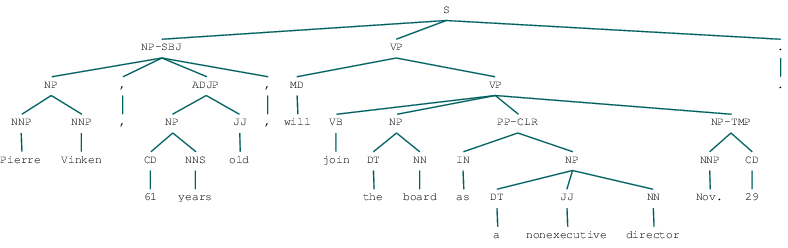

In [31]:
from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t

Sentiment Analysis

In [7]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

/home/sameer/anaconda3/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
n_instances = 100
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
len(subj_docs), len(obj_docs)

(100, 100)

In [9]:
subj_docs[0]

(['smart',
  'and',
  'alert',
  ',',
  'thirteen',
  'conversations',
  'about',
  'one',
  'thing',
  'is',
  'a',
  'small',
  'gem',
  '.'],
 'subj')

In [34]:
obj_docs[0]

(['the',
  'movie',
  'begins',
  'in',
  'the',
  'past',
  'where',
  'a',
  'young',
  'boy',
  'named',
  'sam',
  'attempts',
  'to',
  'save',
  'celebi',
  'from',
  'a',
  'hunter',
  '.'],
 'obj')

In [10]:
train_subj_docs = subj_docs[:80]
test_subj_docs = subj_docs[80:100]
train_obj_docs = obj_docs[:80]
test_obj_docs = obj_docs[80:100]
training_docs = train_subj_docs+train_obj_docs
testing_docs = test_subj_docs+test_obj_docs

sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])

In [11]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
len(unigram_feats)

83

In [12]:
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

In [13]:
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)

In [14]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)

Training classifier


In [15]:
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))

Evaluating NaiveBayesClassifier results...
Accuracy: 0.8
F-measure [obj]: 0.8
F-measure [subj]: 0.8
Precision [obj]: 0.8
Precision [subj]: 0.8
Recall [obj]: 0.8
Recall [subj]: 0.8
